# Simple Linear Regression
Stpes
1. Reading and understanding the Data
2. Training the model
3. Residual analysis
4. Predictng and evaluating 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# read the data
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
advertising.shape

(200, 4)

In [12]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


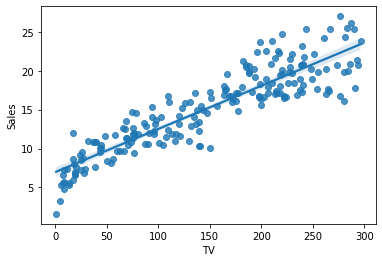

In [16]:
# visualise the data
sns.regplot( x='TV', y='Sales',data=advertising)

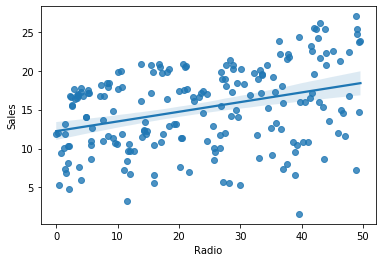

In [17]:
sns.regplot( x='Radio', y='Sales',data=advertising)

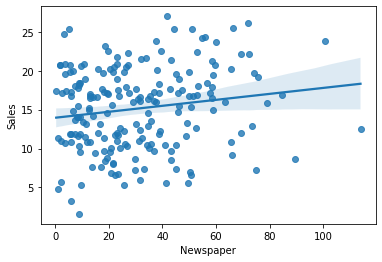

In [18]:
sns.regplot( x='Newspaper', y='Sales',data=advertising)

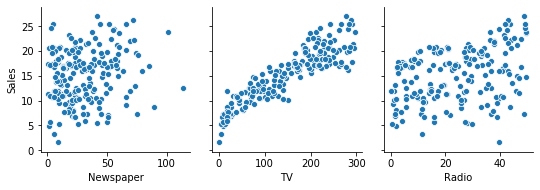

In [19]:
sns.pairplot( data=advertising, x_vars=['Newspaper','TV','Radio'],y_vars=['Sales'])

In [21]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


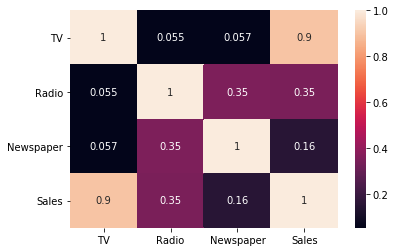

In [22]:
sns.heatmap(advertising.corr(), annot=True)

###Step 2: Performing Simple Linear Regression
**Equation of linear regression
**y=c+m1x1+m2x2+...+mnxny=c+m1x1+m2x2+...+mnxn 
yy  is the response
cc  is the intercept
m1m1  is the coefficient for the first feature
mnmn  is the coefficient for the nth feature
In our case:

y=c+m1×TVy=c+m1×TV 
The  mm  values are called the model coefficients or model parameters.






Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [77]:
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Steps:
create x and y
create train and test sets (70-30,80-20)
Train your model on the training set
Evaluate the model (training set)

In [26]:
# create x and y
X = advertising['TV']
y = advertising['Sales']

In [33]:
# train and test split
X_train ,X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [34]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [35]:
# training the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [ ]:
# y = c + m1. X1
# y = c.const + m1.TV

In [37]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)#ols: ordinary least square
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [40]:
# Sales = 6.94 + 0.05.TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 25 May 2020   Prob (F-statistic):           1.52e-52
Time:                        17:31:10   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#1. coef and p-value is very low
#2. R-squared is 81.6$, very high which is good 
#3. F-statistic is low => the fit is not by chance 

In [49]:
y_train_pred = lr_model.predict(X_train_sm)

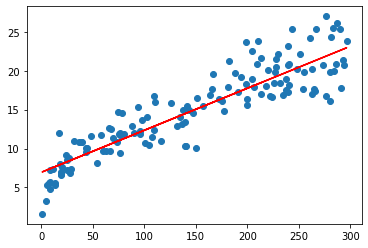

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train,'r')
plt.show()

### Step 3: Residual Analysis

In [51]:
# error = f(y_train, y_train_pred)

In [53]:
res = y_train-y_train_pred

Text(0.5, 1.0, 'Residual Plot')

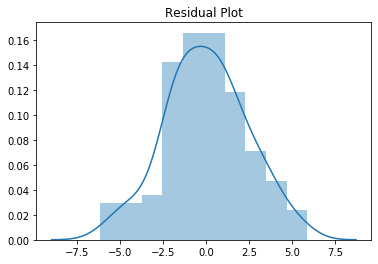

In [55]:
# plot the residual
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

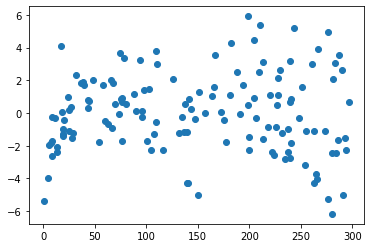

In [56]:
# look for patterns in residual(we should not be able to identify)
plt.scatter(X_train, res)
plt.show()

### Step 4: Predictions and Evaluation on the Test Set

In [57]:
# predictions on the test set (y_test_pred)
#evaluate the model, r-squared on the test

In [63]:
# add a constant
X_test_sm = sm.add_constant(X_test)
# pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [68]:
#evaluate the model, r-squared on the test
# r-squared 
r2 = r2_score(y_true = y_test, y_pred =y_test_pred)
r2

0.7921031601245658

In [70]:
# r2 on train
r2_score(y_true = y_train, y_pred = y_train_pred)

0.8157933136480389

In [72]:
# mean squared error 
mean_squared_error( y_true = y_test, y_pred= y_test_pred)

4.077556371826956

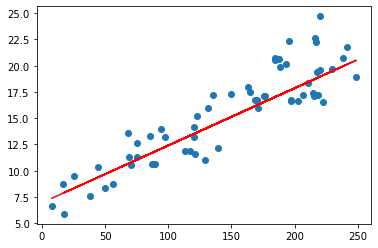

In [74]:
plt.scatter(X_test, y_test)
plt.plot(X_test , y_test_pred ,'r')
plt.show()

### Linear Regression using sklearn

In [76]:
# train test split
X_train ,X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [84]:
#reshape to (40,1)
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)
#(140, )
#(140,1)

In [86]:
# steps in sklearn model building

# 1. Create an object of linear regression
lm = LinearRegression()
# 2. Fit the model 
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# 3. see the params, make predicitions(train,test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [90]:
#make predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [92]:
# 4.evaluate (r2,etc.)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566
